# Full Pipeline

In [1]:
import sys
sys.path.append('../script/')
from prepare_data import DataPreparationTrain
from results_visualisation import ResultsEvaluation, ResultsVisualisation, EvalWithoutScaling

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 236.6/460.4 GB disk)


## Prediction

In [2]:
path_weights = "../trained_models/weights2/best.pt"
model = YOLO(path_weights)

In [3]:
path_images_test = "../data/all_images/"
results=model.predict(source=path_images_test,conf=0.4, save = True, project = "../logs")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2350 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/all_images/1000407040.jpg: 416x640 1 Car, 117.3ms
image 2/2350 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/all_images/1000472576.jpg: 384x640 1 Car, 103.1ms
image 3/2350 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/all_images/1000669184.jpg: 416x640 1 Car, 113.6ms
image 4/2350 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/all_images/1000800256.jpg:

In [4]:
eval = EvalWithoutScaling(results, "../data/train_annotation/", "_annotation.csv")

In [5]:
eval.get_results_as_dataframe()

,im_name,x_min,y_min,x_max,y_max,class,models,pred_class,pred_x1,pred_y1,pred_x2,pred_y2
0,1000407040.jpg,7.0,26.0,392.0,225.0,1,Toyota Sequoia SUV 2012,1.0,8.606644,23.606834,389.969299,222.414108
1,1000472576.jpg,27.0,62.0,519.0,298.0,1,Toyota Sequoia SUV 2012,1.0,24.356081,48.368446,521.568420,299.947021
2,1000669184.jpg,6.0,62.0,499.0,286.0,1,Toyota Sequoia SUV 2012,1.0,0.367689,65.002678,496.591675,286.362427
3,1000800256.jpg,68.0,16.0,450.0,222.0,1,Toyota Sequoia SUV 2012,1.0,62.592461,12.462664,451.488586,220.538269
4,1001324544.jpg,33.0,56.0,408.0,294.0,1,Toyota Sequoia SUV 2012,1.0,36.051590,54.053444,404.568085,300.615814
...,...,...,...,...,...,...,...,...,...,...,...,...
2345,993853440.jpg,54.0,81.0,915.0,484.0,1,Suzuki SX4 Sedan 2012,1.0,27.515331,76.480957,915.529968,494.838562
2346,994246656.jpg,46.0,127.0,675.0,481.0,1,Suzuki SX4 Sedan 2012,1.0,47.330303,126.837654,673.025818,486.452515
2347,999489536.jpg,80.0,198.0,940.0,583.0,1,Toyota Sequoia SUV 2012,1.0,84.854980,198.322662,943.953125,596.896973
2348,999686144.jpg,77.0,124.0,528.0,297.0,1,Toyota Sequoia SUV 2012,1.0,85.837318,122.128593,518.982300,292.072723


In [6]:
eval.compute_IoU()

,im_name,x_min,y_min,x_max,y_max,class,models,pred_class,pred_x1,pred_y1,pred_x2,pred_y2,IoU
0,1000407040.jpg,7.0,26.0,392.0,225.0,1,Toyota Sequoia SUV 2012,1.0,8.606644,23.606834,389.969299,222.414108,0.966171
1,1000472576.jpg,27.0,62.0,519.0,298.0,1,Toyota Sequoia SUV 2012,1.0,24.356081,48.368446,521.568420,299.947021,0.928243
2,1000669184.jpg,6.0,62.0,499.0,286.0,1,Toyota Sequoia SUV 2012,1.0,0.367689,65.002678,496.591675,286.362427,0.969272
3,1000800256.jpg,68.0,16.0,450.0,222.0,1,Toyota Sequoia SUV 2012,1.0,62.592461,12.462664,451.488586,220.538269,0.958951
4,1001324544.jpg,33.0,56.0,408.0,294.0,1,Toyota Sequoia SUV 2012,1.0,36.051590,54.053444,404.568085,300.615814,0.949154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,993853440.jpg,54.0,81.0,915.0,484.0,1,Suzuki SX4 Sedan 2012,1.0,27.515331,76.480957,915.529968,494.838562,0.933986
2346,994246656.jpg,46.0,127.0,675.0,481.0,1,Suzuki SX4 Sedan 2012,1.0,47.330303,126.837654,673.025818,486.452515,0.979295
2347,999489536.jpg,80.0,198.0,940.0,583.0,1,Toyota Sequoia SUV 2012,1.0,84.854980,198.322662,943.953125,596.896973,0.954711
2348,999686144.jpg,77.0,124.0,528.0,297.0,1,Toyota Sequoia SUV 2012,1.0,85.837318,122.128593,518.982300,292.072723,0.923462


<Axes: >

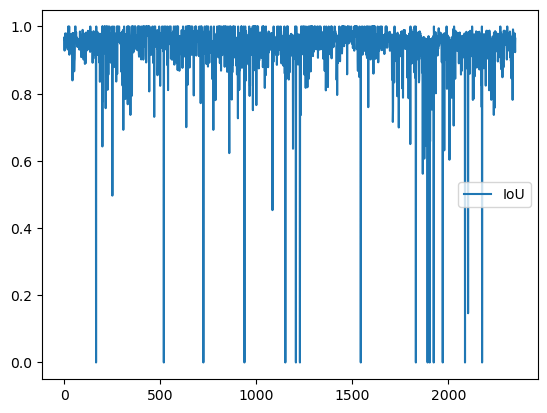

In [7]:
eval.df_results.plot(y = "IoU")

{'whiskers': [<matplotlib.lines.Line2D at 0x16845f820>,
 'caps': [<matplotlib.lines.Line2D at 0x16845fd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x16845f520>],
 'medians': [<matplotlib.lines.Line2D at 0x1684601c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168460460>],
 'means': []}

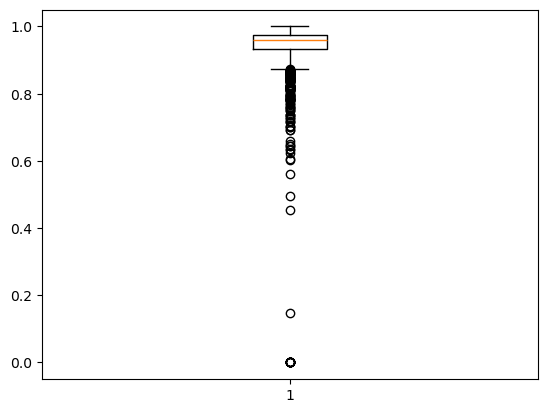

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(eval.df_results["IoU"])

In [9]:
(eval.df_results[eval.df_results["IoU"] < 0.001]["pred_x1"] == 0).sum()/len(eval.df_results[eval.df_results["IoU"] < 0.001])

0.6

In [13]:
(eval.df_results[eval.df_results["IoU"] < 0.001]["pred_x1"] == 0).sum()

9